**Multi-class dog breed classification**

This notebook builds a multi-class image classifier using TensorFlow 

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

Data from Kaggle's dog breed identification competition:

https://www.kaggle.com/c/dog-breed-identification

## 3. Evaluation

Submissions for Kaggle's competition are evaluated on Multi Class Log Loss between the predicted probability and the observed target.
For each image in the test set you have to predict probability for every dog breed.

For details check Kaggle's website:

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

https://www.kaggle.com/c/dog-breed-identification/data

We are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. 

We're dealing with images (unstructured data) do the best approach is to use deep learning/transfer learning.

### Get the workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure you're using GPU

In [ ]:
# Import tools
import tensorflow as tf
import tensorflow_hub as hub

# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


### Getting the data ready. Turning it into tensors (numerical representation).

In [ ]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/ Dog breed identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head()) 

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     3d7942e85b2977c6298d3ff41b84e3f1  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# How many images are there of each breed ?
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

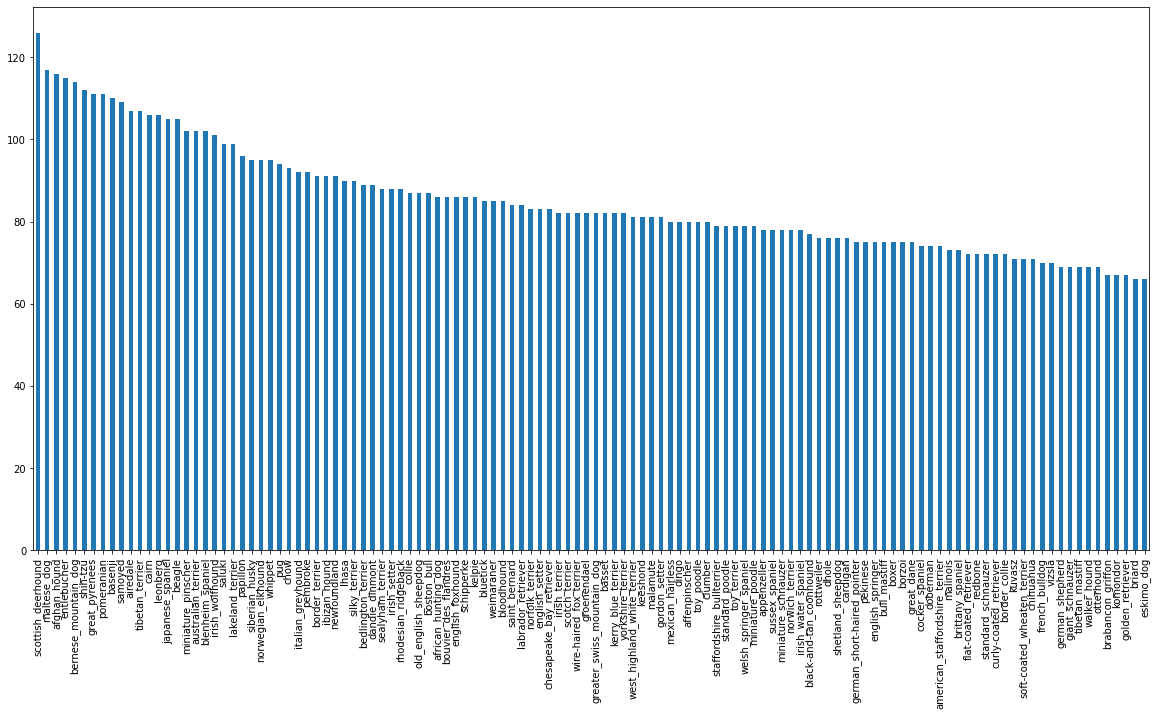

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

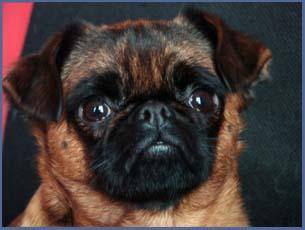

In [ ]:
# Viewing an image
from IPython.display import Image
Image("/content/drive/MyDrive/ Dog breed identification/train/0d303784e6740e5de249e1f2078a7b4b.jpg")

### Getting images and their labels

In [ ]:
# Create pathnames from imafe ID's
filenames = ["/content/drive/MyDrive/ Dog breed identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:20]

['/content/drive/MyDrive/ Dog breed identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/ Dog breed identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/MyDrive/ Dog breed iden

In [ ]:
# Check whether number of filenames matches number of actual image files
import os

if len(os.listdir("/content/drive/MyDrive/ Dog breed identification/train/")) == len(filenames):
  print("Filenames match the number of files")
else:
  print("Filenames DO NOT match the number of files")


Filenames match the number of files


In [ ]:
# Preparing labels
import numpy as np 
labels = labels_csv["breed"].to_numpy() 
# labels = np.array(labels) # the same as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
 # Check if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches the number of filenames")
else:
  print("Number of labels DOES NOT match the number of filenames")
 

Number of labels matches the number of filenames


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds.size

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs]
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Splitting data (creating validation set)

Data from Kaggle doesn't have a validation set.

In [ ]:
# Setup X and y variables
X = filenames
y = boolean_labels

Because working on such a large dataset (over 10000) would take a lot of time we will start experimenting on about 1000 images. 

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000} 

In [ ]:
# Let's split data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2, 
                                                  random_state = 42)

### Preprocessing images - turning images into tensors

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn an `image` (a .jpg in this case) into Tensors
4. Normalize images (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [ ]:
# Before we do the above steps let's see how importing an image looks like.

# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
# Every image is built from pixels, and each pixel is a combination of red, green and blue values between 0 and 255
# For details check: https://en.wikipedia.org/wiki/Channel_(digital_image)
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [ ]:
### Now let's make a funciton to preprocess images

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the .jpg image into numerical Tensor with 3 color channels(RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0 to 255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to the desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

### Turning data into batches

Batches - we calculate on a batch of up to 32 images (not more) and another calculation is on next batch of 32 images. Doing it one at a time (like in here - over 10000 images) might not fit into memory.

In order to use TensorFlow effectively the data needs to be in the form of Tensor tuples which looks like this:
`(image, label)`

In [ ]:
# Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, processes the image 
  and returns a tuple (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image(X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is the test dataset we don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # only paths, no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths 
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Create training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns an image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
  # Create training and validation data batches
  train_data = create_data_batches(X_train, y_train)
  val_data = create_data_batches(X_val, y_val, valid_data=True)

Create training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches

The data is now in batches but to understand it better let's visualize it.

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          [1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          [1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          ...,
          [5.09803966e-02, 3.13725509e-02, 7.84313772e-03],
          [5.09803966e-02, 3.13725509e-02, 7.84313772e-03],
          [5.09803966e-02, 3.13725509e-02, 7.84313772e-03]],
 
         [[1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          [1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          [1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          ...,
          [5.09803966e-02, 3.13725509e-02, 7.84313772e-03],
          [5.09803966e-02, 3.13725509e-02, 7.84313772e-03],
          [5.09803966e-02, 3.13725509e-02, 7.84313772e-03]],
 
         [[1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          [1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          [1.17647070e-02, 1.56862754e-02, 0.00000000e+00],
          ...,
          [5.09803966e-02, 3.13725509e-02, 7.8431

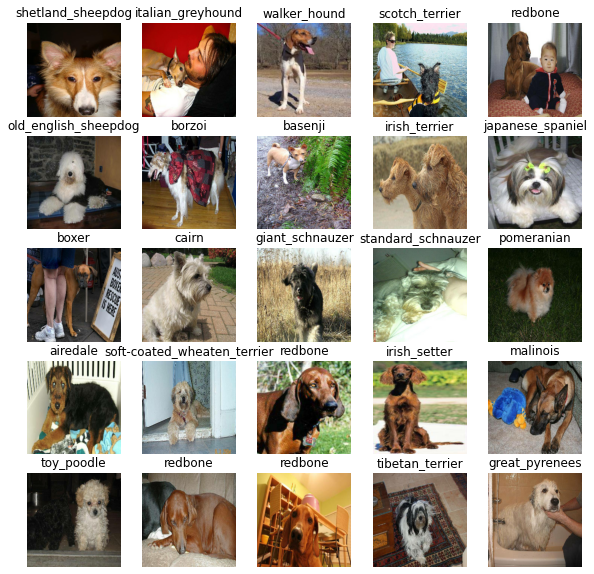

In [ ]:
# Visualizing the data in a training batch
show_25_images(train_images, train_labels)

### Building a model

Before building a model we have to define:

* The input shape (our images shape in the form of Tensors) 
* The output shape (image labels in the form of Tensors)
* The URL of the model we want to use

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

## Keras deep learning model
Create a function which:
* takes the input shape, output shape and the model we've chosen as parameters
* defines the layers in a Kears model in sequential fashion (first this, then this, then that)
* compiles the model (says how it should be evaluated and improved
* builds the model (tells the model the input shape it'll be getting)
* returns the model

In [ ]:
# Create a funciton which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Buildin a model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # Layer 2 (output layer)
                               ])
  
  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  # Return the model
  return model

In [ ]:
model = create_model()
model.summary()

Buildin a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
